In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import time
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
ga = [1,1,1,-1,1,1,-1,1,1,1,1,-1,-1,-1,1,-1,1,1,1,-1,1,1,-1,1,-1,-1,-1,1,1,1,-1,1]
gb = [1,1,1,-1,1,1,-1,1,1,1,1,-1,-1,-1,1,-1,-1,-1,-1,1,-1,-1,1,-1,1,1,1,-1,-1,-1,1,-1]

def cross_corr(a, b):
    a_binary = a - a.mean()
    b_binary = b - b.mean()
    
    xa = np.correlate(a_binary, ga, "full")
    xb = np.correlate(b_binary, gb, "full")
    
    return xa + xb

In [3]:
df = pd.read_csv("04_29_22/GOLAYSEQ.CSV")
df = df[: 28578] #remove end

date = "04_29_22/"

In [4]:
start_time = time.strptime("2022-04-22-10-30", '%Y-%m-%d-%H-%M')
start_time = time.mktime(start_time) - 4 * 60 * 60 #convert UTC to EST

In [5]:
out = []

df["meas_time"]= df.sec + start_time + df.day * 86400

#compute golay sequences for each measurement
for i in df.meas_time.unique():
    sub_df = df[df.meas_time == i]

    a = sub_df[1 : 33].value
    b = sub_df[34 :].value
    
    results = cross_corr(a,b)
    out.append(results[31])


/var/folders/6m/5pkl5r3951b4qgdppsky0l040000gn/T/ipykernel_57449/355308999.py:1: MatplotlibDeprecationWarning: The epoch2num function was deprecated in Matplotlib 3.5 and will be removed two minor releases later. Use ``[date2num(datetime.utcfromtimestamp(t)) for t in e]`` or numpy.datetime64 types instead.
  secs = mdates.epoch2num(df.meas_time.unique())


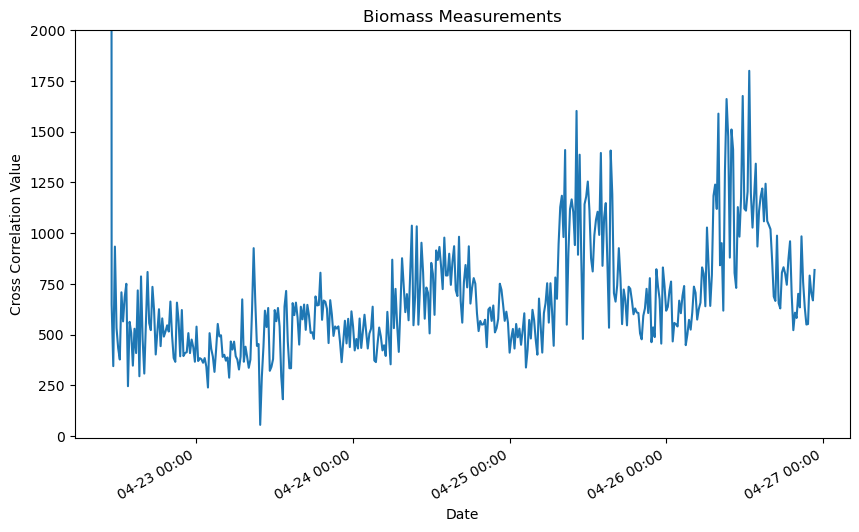

In [6]:
secs = mdates.epoch2num(df.meas_time.unique())
date_fmt = '%m-%d %H:%M'

# Use a DateFormatter to set the data to the correct format.
date_formatter = mdates.DateFormatter(date_fmt)

plt.figure(figsize=(10,6))
plt.gca().xaxis.set_major_formatter(date_formatter)
# plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.plot(secs,out)
plt.gcf().autofmt_xdate()
plt.xlabel("Date")
plt.title("Biomass Measurements")
plt.ylabel("Cross Correlation Value")
# plt.xlim([19102.5,19104.5])
plt.ylim([-10,2000])
plt.savefig(date + "golay.jpg")
plt.show()

## Binary Data

/var/folders/6m/5pkl5r3951b4qgdppsky0l040000gn/T/ipykernel_57449/2585766333.py:12: MatplotlibDeprecationWarning: The epoch2num function was deprecated in Matplotlib 3.5 and will be removed two minor releases later. Use ``[date2num(datetime.utcfromtimestamp(t)) for t in e]`` or numpy.datetime64 types instead.
  secs_on = mdates.epoch2num(secs_on)
/var/folders/6m/5pkl5r3951b4qgdppsky0l040000gn/T/ipykernel_57449/2585766333.py:13: MatplotlibDeprecationWarning: The epoch2num function was deprecated in Matplotlib 3.5 and will be removed two minor releases later. Use ``[date2num(datetime.utcfromtimestamp(t)) for t in e]`` or numpy.datetime64 types instead.
  secs_off = mdates.epoch2num(secs_off)


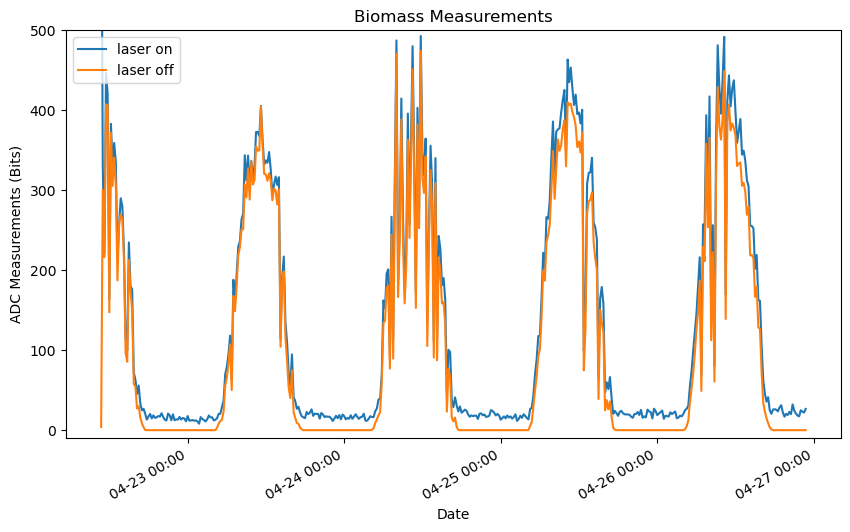

In [7]:
secs_on = df.meas_time[df.name == "1"].unique()
secs_off = df.meas_time[df.name == "0"].unique()

val_on, val_off = [], []

for i in df.meas_time.unique():
    sub_df = df[df.meas_time == i]
    val_on.append(np.mean(sub_df.value[sub_df.name == "1"]))
    val_off.append(np.mean(sub_df.value[sub_df.name == "0"]))


secs_on = mdates.epoch2num(secs_on)
secs_off = mdates.epoch2num(secs_off)

date_fmt = '%m-%d %H:%M'

# Use a DateFormatter to set the data to the correct format.
date_formatter = mdates.DateFormatter(date_fmt)

plt.figure(figsize=(10,6))
plt.gca().xaxis.set_major_formatter(date_formatter)
# plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.plot(secs_on,val_on)
plt.plot(secs_off, val_off)
plt.gcf().autofmt_xdate()
plt.xlabel("Date")
plt.title("Biomass Measurements")
plt.ylabel("ADC Measurements (Bits)")
plt.legend(["laser on", "laser off"])
# plt.xlim([19097.7,19100.1])
plt.ylim([-10,500])
plt.savefig(date + "raw.jpg")
plt.show()

In [8]:
log = pd.read_csv(date + "LOG.CSV")
log["meas_time"]= log.sec + start_time + log.day * 86400
log = log[: 1302]
log.tail()

,day,sec,event,value,meas_time
1297,4.0,43248.0,battery,3.8,1.651012e+09
1298,4.0,43248.0,charging,0.0,1.651012e+09
1299,4.0,44149.0,measurement,NaN,1.651013e+09
1300,4.0,44149.0,battery,3.8,1.651013e+09
1301,4.0,44149.0,charging,0.0,1.651013e+09


/var/folders/6m/5pkl5r3951b4qgdppsky0l040000gn/T/ipykernel_57449/1370716659.py:6: MatplotlibDeprecationWarning: The epoch2num function was deprecated in Matplotlib 3.5 and will be removed two minor releases later. Use ``[date2num(datetime.utcfromtimestamp(t)) for t in e]`` or numpy.datetime64 types instead.
  xb = mdates.epoch2num(xb)
/var/folders/6m/5pkl5r3951b4qgdppsky0l040000gn/T/ipykernel_57449/1370716659.py:7: MatplotlibDeprecationWarning: The epoch2num function was deprecated in Matplotlib 3.5 and will be removed two minor releases later. Use ``[date2num(datetime.utcfromtimestamp(t)) for t in e]`` or numpy.datetime64 types instead.
  xc = mdates.epoch2num(xc)


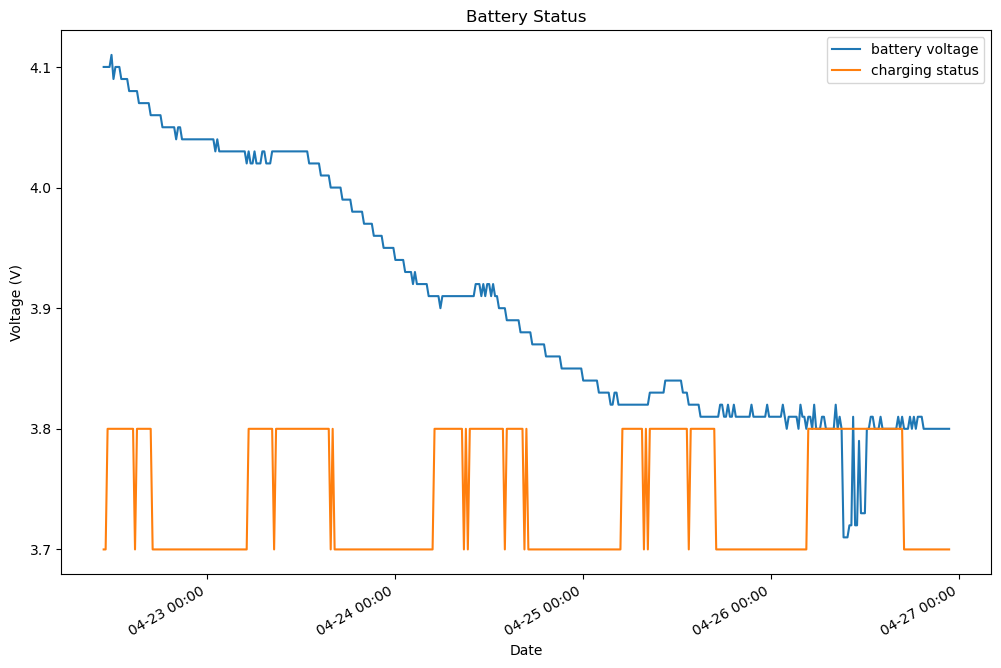

In [9]:
yb = log.value[log.event == "battery"]
yc = log.value[log.event == "charging"] * .1 + 3.7
xb = log.meas_time[log.event == "battery"]
xc = log.meas_time[log.event == "charging"]

xb = mdates.epoch2num(xb)
xc = mdates.epoch2num(xc)

plt.figure(figsize=(12,8))
plt.gca().xaxis.set_major_formatter(date_formatter)
# plt.gca().xaxis.set_major_locator(mdates.DayLocator())
# plt.plot(secs_on,val_on)
# plt.plot(secs_off, val_off)
plt.plot(xb,yb)
plt.plot(xc,yc)
plt.gcf().autofmt_xdate()
plt.xlabel("Date")
plt.title("Battery Status")
plt.ylabel("Voltage (V)")
plt.legend(["battery voltage", "charging status"])
# plt.legend(["laser on", "laser off", "battery V"])
# plt.xlim([19101.2,19101.8])
# plt.ylim([3.8,4.2])
plt.savefig(date + "battery.jpg")
plt.show()